# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To complete my Data Analysis Project,I am using TMDB Movie Dataset.
This dataset contains records of more than 10,000 movies with features and some information about the movies such as 
the title,popularity,budget,revenue,cast,director,tagline,runtime,genres,release date and so on.

In the Data analysis process,I will analyse some of the characteristics from the data given by first wrangling 
and cleaning the dataset to get a clean dataset where I can perform all operations correctly.

Some of the questions that can be analysed from the dataset are:
1)Which movie made the highest profit?
2)What runtime of movies is mostly made?
3)Did the number of movies made increase from 1965 to 2015?
4)Do high budget movies earn more profit or do low budget movies earn more profit?
5)Comparision of Budget and Profit w.r.t years

In [42]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing all the important packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the data and printing the first few rows
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
df.shape

(10866, 21)

In [6]:
# As we see that there are 10865(index starts from 0) rows and 21 columns,but all of those columns are not necessary for analysis,
# so we will drop the columns that are not necessary for our analysis.
del_col = ['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'production_companies', 'vote_count', 
           'vote_average', 'budget_adj', 'revenue_adj']
df=df.drop(del_col,1)

In [7]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB


In [9]:
# From df.info() we can see that there are too many null values in keywords,so we can also drop that column
del_col2=['keywords']
df=df.drop(del_col2,1)

In [10]:
df.info()
# we can see that the keywords column has been dropped,but still many of the columns are having null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 849.0+ KB




### Data Cleaning - Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.

In [10]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

#we have to check whether any duplicate rows are present or not
sum(df.duplicated())

1

In [11]:
# since 1 row is having dupliacted values,so we have to drop that row
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 933.7+ KB


In [12]:
# here we can see that a row is less now,but the datatype for release_date is showing as object
# so we have to convert the datatype of release_date to datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
release_year      10865 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 933.7+ KB


In [13]:
# Now the release_date datatype is in correct format
# Now we have to drop the rows where null values are present
df.dropna(inplace=True)

In [14]:
# To check whether there still any null value or not 
df.isnull().sum().any()

False

In [15]:
# Since the output came as False it means that there is no null value present,we can also see that as the following
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 922.2+ KB


In [13]:
# We have to check if there is any zero values present in th dataset,
# so to check it we have to check in the integer and float columns like popularity,budget,revenue,runtime and release_year
# Upomn checking we saw that budget,revenue and runtime columns have 0 values in them

df.query('budget==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,2015
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,2015
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,2015
88,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,9/4/15,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,2015
95,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure|Animation|Comedy|Family,12/17/15,2015
100,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,3/9/15,2015
101,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,9/26/15,2015


In [17]:
df.query('revenue==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,2015-01-14,2015
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,2015-05-21,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,2015-06-24,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,2015-06-12,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,2015-12-19,2015
93,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,2015-01-16,2015
100,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,2015-03-09,2015
101,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,2015-09-26,2015
103,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Thriller|Action,2015-04-11,2015
116,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,2015-01-09,2015


In [18]:
df.query('runtime==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,2015-12-19,2015
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,2015-11-09,2015
410,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,2015-01-01,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,2015-10-09,2015
486,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,2015-04-05,2015
595,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,2015-01-01,2015
616,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,2015-11-10,2015
1289,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,2014-10-20,2014
1293,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,2014-10-30,2014
1849,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,2009-02-16,2009


In [14]:
# we have to replace the zero values with the null values so that we can drop that rows

correcting_row = ['budget', 'revenue','runtime']
df[correcting_row] = df[correcting_row].replace(0, np.NaN)

In [15]:
# dropping the rows having null values 

df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
release_year      3849 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 330.8+ KB


 we can see that after cleaning the dataset we are left with 3849 columns and so now we can 
 perform operations for our data analysis

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Which movie made the highest profit

In [16]:
# For finding the profit of each movie we have to subtract the budget from revenue
# then we will make a new column for profit and use the max() function to find which movie made the highest profit
profit=df.revenue-df.budget

In [17]:
df['profit']=profit
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.363529e+09


We can see that the profit column has been added at the last.

In [18]:
# Using the max() function we will know which movie made teh highest profit
df[df['profit']==df['profit'].max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009,2.544506e+09


We can see that 'Avatar' has made the highest profit.

### Research Question 2 - What runtime of movies is mostly made?

For analysing we categorize the movies into four intervals - Small,Moderately Small,Normal,Long 
by taking the values from the describe() function.Then we add a new column which tells about the runtime of 
the movies and after that we use the value_count method to see the count and tehn analyse it with the 
help of graphs.

In [21]:
df['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [22]:
# Giving the bin_edges values of min,25%,50%,75% and max

bin_edges=[15.0,95.0,106.0,119.0,338.0]

In [23]:
bin_names=['Small','Moderately Small','Normal','Long']

In [24]:
df['movie_length']=pd.cut(df['runtime'],bin_edges,labels=bin_names)

In [34]:
# To check the new column movie_length has been added 
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,movie_length,movie_period
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.363529e+09,Long,2005-2015


In [35]:
movie_length=df['movie_length'].value_counts()
movie_length

Moderately Small    1056
Small                962
Long                 942
Normal               888
Name: movie_length, dtype: int64

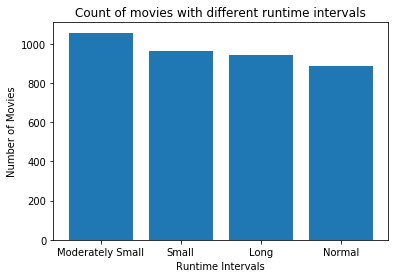

In [38]:
locations=[1,2,3,4]
heights=[1056,962,942,888]
labels=['Moderately Small','Small','Long','Normal']
plt.bar(locations,heights,tick_label=labels)
plt.title('Count of movies with different runtime intervals')
plt.xlabel('Runtime Intervals')
plt.ylabel('Number of Movies');

From the above chart we can say that movies with time interval of (95-106)mins are made most.

### Research Question 3 - Did the number of movies made increase from 1965 to 2015

For this analysis we divide in intervals of 10 years starting from 1965 to 2015

In [26]:
bin_edges=[1965.0,1975.0,1985.0,1995.0,2005.0,2015.0]

In [27]:
bin_names=['1965-1975','1975-1985','1985-1995','1995-2005','2005-2015']

In [28]:
df['movie_period']=pd.cut(df['release_year'],bin_edges,labels=bin_names)

In [29]:
# To check the new column movie_period has been added 
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit,movie_length,movie_period
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.363529e+09,Long,2005-2015


In [39]:
movie_count=df['movie_period'].value_counts()
movie_count

2005-2015    1712
1995-2005    1168
1985-1995     572
1975-1985     260
1965-1975      97
Name: movie_period, dtype: int64

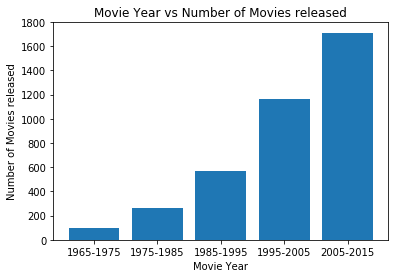

In [41]:
locations=[1,2,3,4,5]
heights=[97,260,572,1168,1712]
labels=['1965-1975','1975-1985','1985-1995','1995-2005','2005-2015']
plt.bar(locations,heights,tick_label=labels)
plt.title('Movie Year vs Number of Movies released')
plt.xlabel('Movie Year')
plt.ylabel('Number of Movies released');

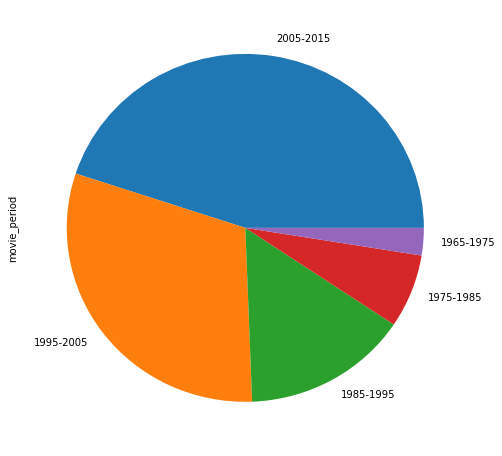

In [32]:
df['movie_period'].value_counts().plot(kind='pie',figsize=(8,8))

From the above Bar Graph and Pie Chart we can clearly say that the highest number of movies has been made in the interval
2005-2015 and the least number of movies has been made in the year 1965-1975.So we can clearly say that the number of movies made increases as years pass by.

### Research Question 4- Do high budget movies earn more profit or do low budget movies earn more profit?

For this analysis we will first find the median of buget using the median() function.
Then we will divide the values lower and higher than the median into two different categories.After that 
we will find the median from both the categories and plot it. 

In [43]:
median=df['budget'].median()

In [44]:
low_budget=df.query('budget<{}'.format(median))
high_budget=df.query('budget>={}'.format(median))

In [45]:
mean_profit_low=low_budget['profit'].mean()
mean_profit_high=high_budget['profit'].mean()

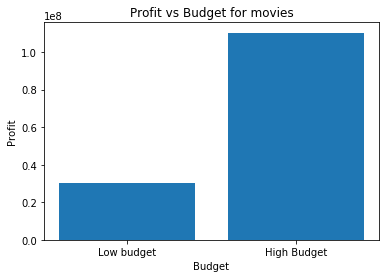

In [46]:
locations=[1,2]
heights=[mean_profit_low,mean_profit_high]
labels=['Low budget','High Budget']
plt.bar(locations,heights,tick_label=labels)
plt.title('Profit vs Budget for movies')
plt.xlabel('Budget')
plt.ylabel('Profit');

From the above Bar Chart we can clearly say that movies made with higher budget earn more profit in most of the 
cases than movies made with low budget.

### Research Question 5- Comparision of Budget and Profit w.r.t years

For this analysis we will compare two variables(budget and profit) with respect to years in which we have 10 year intervals

In [46]:
colors=['red','blue']

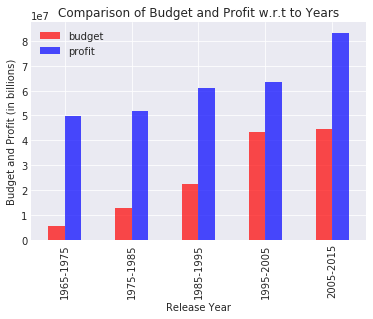

In [48]:
color_means=df.groupby('movie_period')['budget','profit'].mean()
color_means.plot(kind='bar',title='Comparison of Budget and Profit w.r.t to Years',color=colors,alpha=.7)
plt.xlabel('Release Year')
plt.ylabel('Budget and Profit (in billions)');

From the above graph we can see that as years passed by the budget of the movies increased as well as the profit of the movies in each 10 year time interval

<a id='conclusions'></a>
## Conclusions
This analysis of TMDB Movie Dataset was a very interesting analysis.I came out with some very
interesting facts about movies which I can conclude as:
1> Movies are not popular with too much short runtime and too much long runtime,the ideal interval runtime of a movie should  
   be around (95-106)mins.
2> We can see that the number of movies made has increased from 1965 to 2015 drastically.This can be due to more number
   of movie watching people are increasing due to better content,more number of cinema halls and other aspects.
3> Movies with a high budget have more chances of being successful and more popular as those movies guarantee more better 
   actors,better direction,better shooting places and much more.
4> Movies are getting more popular day by day as the number of people watching movies is increasing day by day.

Limitations- After doing the analysis, it might not be completely error free but by following the above conclusions one can increase the probability of a movie to become a hit or to watch a more successful movie. Moreover it not sure that the data provided is completely accurate and correct.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])